# Gather

## File on hand
The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: twitter_archive_enhanced.csv

In [1]:
import pandas as pd

In [2]:
#The WeRateDogs twitter archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

## Requesting a file from a server
The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv


In [3]:
import requests
import os

In [4]:
#tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
#save file to computer
with open (os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [6]:
#make it into a dataframe
tweet_image_predictions = pd.read_csv('image-predictions.tsv', sep= '\t')

# Gathering data using Twitter's API

Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

Note: also using this dataframe to collect missing data from the twitter_archive (expanded_urls) and getting the proper format for in_reply_to_status_id and in_reply_to_user_id.  They are floats in the twitter_archive and they are being presented in scientific notation.  Collecting the string version of them and will keep them as strings since we will not be doing calculations with them.

In [7]:
import tweepy
consumer_key= KEY
consumer_secret = SECRET
access_token= TOKEN
access_token_secret = TOKEN_SECRET
auth = tweepy.OAuthHandler(consumer_key, consumer_secret
                           )
auth.set_access_token(access_token, access_token_secret 
                      )

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)

In [7]:
import numpy as np
import json

In [9]:
tweet_ids = twitter_archive['tweet_id']
error_ids = []
for tweet_id in np.nditer(tweet_ids):
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        
        with open('tweet_json.txt', 'a') as file:  
            json.dump(tweet._json, file)
            file.write('\n')
             
        print(tweet_id)
    except:
        error_ids.append(tweet_id)

Rate limit reached. Sleeping for: 717
Rate limit reached. Sleeping for: 715


In [8]:
error_ids=[888202515573088257, 873697596434513921, 869988702071779329, 866816280283807744, 861769973181624320, 
           842892208864923648, 837012587749474308, 827228250799742977, 802247111496568832, 775096608509886464]

len(error_ids)

10

In [9]:
data = []
with open('tweet_json.txt') as f:
    for line in f:
        data.append(json.loads(line))


In [10]:
rows_list = []
for i in range(len(data)):
    json = data[i]
    dict1 = {}
    try:
        dict1['id']=json['id']
    except:
        dict1['id'] = None
    
    try:
        dict1['favorite_count']=json['favorite_count']
    except:
        dict1['favorite_count'] = None
    
    try:
        dict1['retweet_count']=json['retweet_count']
    except:
        dict1['retweet_count'] = None
    
    #choose to see how many followers the WeRateDogs account has
    try:
        dict1['followers_count']=json['user']['followers_count']
    except:
        dict1['followers_count'] = None
    
    #choose to see if the timestamp from the twitter_archive is the same
    try:    
        dict1['timestamp'] = json['created_at']
    except:
        dict1['id'] = None
        
    #choose to fill in the missing expanded_urls from the twitter_archive data set.
    try:
        dict1['expanded_url']= json.get('entities').get('media')[0].get('expanded_url')
    except:
        dict1['expanded_url']=None
    #choose because the in_reply_to_status_ids and user_ids were stored as floats and are in scientific notation.
    try:
        dict1['in_reply_to_status_id']= json['in_reply_to_status_id_str']
    except:
        dict1['in_reply_to_status_id']=None 
    
    try:
        dict1['in_reply_to_user_id']= json['in_reply_to_user_id_str'] 
    except:
        dict1['in_reply_to_user_id']=None
    rows_list.append(dict1)

tweet_counts = pd.DataFrame(rows_list)

## Assess

### twitter_archive

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Column meanings for Tweet JSON data found at: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json

#### Tweet JSON data
tweet_id =The integer representation of the unique identifier for this Tweet. 

in_reply_to_status_id =  If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID.

in_reply_to_user_id =  If the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID. This will not necessarily always be the user directly mentioned in the Tweet.

timestamp = time tweet was posted. modified created_at object.  Modified to YYYY-MM-DD HH:mm:ss

source = Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web.

text = The actual UTF-8 text of the status update. See twitter-text for details on what characters are currently considered valid

retweeted_status =Users can amplify the broadcast of Tweets authored by other users by retweeting . Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute. This attribute contains a representation of the original Tweet that was retweeted. Note that retweets of retweets do not show representations of the intermediary retweet, but only the original Tweet. (Users can also unretweet a retweet they created by deleting their retweet.) 
    retweeted_status_id = 
    retweeted_status_user_id = 
    retweeted_status_timestamp = 

expanded_urls = url for the tweet.

### extracted data from tweet text
rating_numerator = 
rating_denominator=
name = 
#### Stages of dog: 
https://classroom.udacity.com/nanodegrees/nd002/parts/20a33e0b-0f64-41a3-a9d9-c6f1207265c6/modules/14d9f5f1-9e7b-4bfb-97f3-bcdbf4a3699c/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/28d4643b-3785-4700-bdee-4e5fc9963576![image.png](attachment:image.png)
doggo  
floofer  
pupper  
puppo 


In [12]:
#checking to see if all rating_denominator is 10.  All ratings are out of ten.
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
#Name check
twitter_archive['name'].value_counts()


None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
the             8
Sadie           8
Bailey          7
Daisy           7
Buddy           7
an              7
Toby            7
Bella           6
Rusty           6
Jax             6
Jack            6
Scout           6
Leo             6
Stanley         6
Koda            6
Oscar           6
Dave            6
Milo            6
Alfie           5
             ... 
Christoper      1
Pancake         1
Nugget          1
Dante           1
Burt            1
Dudley          1
Lucia           1
Oddie           1
Jangle          1
Mojo            1
Sundance        1
Cermet          1
Jazzy           1
Brockly         1
Hubertson       1
Hamrick         1
Liam            1
Horace          1
Nimbus          1
Harvey          1
Jeb             1
Harrison        1
Obie            1
Kevon           1
Barclay   

In [15]:
twitter_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1487,693095443459342336,NaN,NaN,2016-01-29 15:36:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Milo. He doesn't understand your fancy...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693095443...,10,10,Milo,None,None,pupper,None


In [16]:
reply_tweets = twitter_archive.loc[twitter_archive['in_reply_to_status_id'].notnull()]
reply_tweets.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None


### tweet_image_predictions

In [17]:
tweet_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- Tweet ID - same as twitter_archive,
- jpg_url - image URL for the corresponding photo
- img_num - image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).
- p1 - object prediction
- p1_conf - confidence level of prediction
- p1_dog - is the prediction a dog breed.

In [18]:
tweet_image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1230,745712589599014916,https://pbs.twimg.com/media/CllNnkWWMAEDIAR.jpg,1,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
787,690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False
455,674767892831932416,https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg,1,shower_curtain,0.238855,False,sarong,0.092414,False,kimono,0.056412,False
2015,879492040517615616,https://pbs.twimg.com/media/DDSVWMvXsAEgmMK.jpg,1,German_short-haired_pointer,0.479896,True,vizsla,0.124353,True,bath_towel,0.073320,False


In [19]:
tweet_image_predictions['p1_conf'].describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [20]:
tweet_image_predictions['p2_conf'].describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [21]:
tweet_image_predictions['p3_conf'].describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [22]:
tweet_image_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [23]:
tweet_image_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [24]:
tweet_image_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [25]:
not_dogs = tweet_image_predictions.loc[tweet_image_predictions['p1_dog']== False]
not_dogs = not_dogs.loc[not_dogs['p2_dog']==False]
not_dogs = not_dogs.loc[not_dogs['p3_dog']==False]
not_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 6 to 2074
Data columns (total 12 columns):
tweet_id    324 non-null int64
jpg_url     324 non-null object
img_num     324 non-null int64
p1          324 non-null object
p1_conf     324 non-null float64
p1_dog      324 non-null bool
p2          324 non-null object
p2_conf     324 non-null float64
p2_dog      324 non-null bool
p3          324 non-null object
p3_conf     324 non-null float64
p3_dog      324 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 26.3+ KB


In [26]:
#export not_dogs to visually assess if there is a dog in the photo or not.
not_dogs.to_csv('not_dogs.csv',sep = ',')

### tweet_counts

In [27]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
expanded_url             2069 non-null object
favorite_count           2346 non-null int64
followers_count          2346 non-null int64
id                       2346 non-null int64
in_reply_to_status_id    77 non-null object
in_reply_to_user_id      77 non-null object
retweet_count            2346 non-null int64
timestamp                2346 non-null object
dtypes: int64(4), object(4)
memory usage: 146.7+ KB


In [28]:
tweet_counts.sample()

,expanded_url,favorite_count,followers_count,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,timestamp
1034,https://twitter.com/dog_rates/status/743609206...,4853,5699213,743609206067040256,None,None,1531,Fri Jun 17 01:00:24 +0000 2016


In [29]:
reply_tweet_counts = tweet_counts.loc[tweet_counts['in_reply_to_status_id'].notnull()]
reply_tweet_counts.sample()

,expanded_url,favorite_count,followers_count,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,timestamp
833,None,2838,5698955,766714921925144576,766711819364888576,4196983835,430,Fri Aug 19 19:14:16 +0000 2016


### twitter_archive
#### Quality
- missing some expanded_urls.  This might be because there isn't an image with the tweet.  The expanded url is housed under the media tag, no media, no expanded url.
- data contains retweets.  Only want original tweets
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, are floats, so they are written in scientific notation
    - Cannot change to int because of NaN values. need to address the float format.
- timestamps are objects 
- not all the denominators are 10
- some numerators are really high (1776, 420, etc)
- some numerators are below 10.  I expected all the numerators to be 10 and above because they are good dogs :)
- some names are not actually names (a, an, etc)

#### Tidyness
- dog stages are in multiple columns.

## tweet_image_predictions

#### Quality
- 324 entries do not contain any dog breed predictions amoung the three choices, however some of them are images of dogs.  We only want tweets that contain images of dogs.

#### tidyness
- only have 2075 entries (twitter_archive has 2356 entries).  We only want tweets with images of dogs for our analysis.  


## Tweet_counts

#### Quality
- 10 of the ids didn't get processed because the original tweet had been deleted.
- timestamp isn't a datetime object.

#### Tidyness
- Only have expanded urls for 2069 tweets.  The expanded url is housed under the media tag so if a tweet doesn't have an expanded url, it doesn't have an image attached.  Putting this under tidyness because our final dataframe must only include tweets with images.

# Clean (tweet_counts)

#### Define
- changed timestamp into datetime object

#### Code:

In [30]:
tweet_counts_clean = tweet_counts.copy()

In [31]:
tweet_counts_clean['timestamp']=pd.to_datetime(tweet_counts_clean['timestamp'], format='%a %b %d %H:%M:%S +0000 %Y')

#### Test
- timestamp should be a datetime object

In [32]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 8 columns):
expanded_url             2069 non-null object
favorite_count           2346 non-null int64
followers_count          2346 non-null int64
id                       2346 non-null int64
in_reply_to_status_id    77 non-null object
in_reply_to_user_id      77 non-null object
retweet_count            2346 non-null int64
timestamp                2346 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 146.7+ KB


#### Define:
- subset tweet_counts to only include tweets with images (expanded_url is not null)

#### Code:

In [33]:
tweet_counts = tweet_counts.loc[tweet_counts['expanded_url'].notnull()]

#### Test:
- tweet_counts should have 2069 entries and no null values for expanded_url

In [34]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2345
Data columns (total 8 columns):
expanded_url             2069 non-null object
favorite_count           2069 non-null int64
followers_count          2069 non-null int64
id                       2069 non-null int64
in_reply_to_status_id    23 non-null object
in_reply_to_user_id      23 non-null object
retweet_count            2069 non-null int64
timestamp                2069 non-null object
dtypes: int64(4), object(4)
memory usage: 145.5+ KB


# Clean (tweet_image_predictions)

#### Define
- Copy the column p1_dog to make column is_dog.
- visually analyze pics in not_dogs to determine which images dont have dogs in them.
- change the boolean from False to True  in is_dog if the image is actually a dog. 
- delete the following tweets from tweet_image_predictions because they don't have dogs in them:

In [35]:
tweet_image_clean=tweet_image_predictions.copy()
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
tweet_image_clean['is_dog']=tweet_image_clean['p1_dog']
tweet_image_clean['is_dog'].value_counts()

True     1532
False     543
Name: is_dog, dtype: int64

In [37]:
# These come from visually assessing not_dogs, tweets that three NON-DOG predictions
not_dog_id=[666051853826850816, 666104133288665088, 666293911632134144, 666362758909284353, 
            666411507551481857, 666786068205871104, 666837028449972224, 667369227918143488, 
            667437278097252352, 667443425659232256, 667549055577362432, 667550882905632768, 
            667724302356258817, 667782464991965184, 667873844930215936, 667911425562669056, 
            667937095915278337, 668142349051129856, 668154635664932864, 668226093875376128, 
            668614819948453888, 668643542311546881, 668645506898350081, 668981893510119424, 
            668988183816871936, 668992363537309700, 669015743032369152, 669583744538451968, 
            669661792646373376, 670037189829525505, 670055038660800512, 670079681849372674, 
            670417414769758208, 670449342516494336, 670465786746662913, 670474236058800128, 
            670727704916926465, 670733412878163972, 670783437142401025, 670826280409919488, 
            670838202509447168, 670842764863651840, 671166507850801152, 671390180817915904, 
            671488513339211776, 671511350426865664, 671533943490011136, 671544874165002241, 
            671744970634719232, 671763349865160704, 671855973984772097, 671879137494245376, 
            672231046314901505, 672256522047614977, 672475084225949696, 672614745925664768, 
            672884426393653248, 672970152493887488, 672984142909456390, 673697980713705472,
            673715861853720576, 674045139690631169, 674063288070742018, 674265582246694913, 
            674318007229923329, 674632714662858753, 674690135443775488, 674754018082705410, 
            674781762103414784, 675135153782571009, 675483430902214656, 676098748976615425,
            676215927814406144, 676776431406465024, 676897532954456065, 676942428000112642, 
            676948236477857792, 678675843183484930, 679503373272485890, 679877062409191424, 
            680440374763077632, 680798457301471234, 681302363064414209, 682003177596559360, 
            682406705142087680, 684200372118904832, 684567543613382656, 684880619965411328, 
            684959798585110529, 685547936038666240, 686003207160610816, 686749460672679938, 
            687102708889812993, 687476254459715584, 688211956440801280, 688894073864884227, 
            688908934925697024, 692417313023332352, 693590843962331137, 694669722378485760, 
            695064344191721472, 699088579889332224, 699691744225525762, 700062718104104960, 
            700796979434098688, 702932127499816960, 704113298707505153, 704819833553219584, 
            706901761596989440, 711652651650457602, 712065007010385924, 712092745624633345, 
            714631576617938945, 729113531270991872, 729838605770891264, 730196704625098752, 
            743595368194129920, 746906459439529985, 747204161125646336, 748692773788876800, 
            750506206503038976, 760252756032651264, 768193404517830656, 775729183532220416, 
            785639753186217984, 792913359805018113, 800018252395122689, 804026241225523202, 
            816450570814898180, 819924195358416896, 832769181346996225, 834167344700198914, 
            836677758902222849, 837012587749474308, 840696689258311684, 847962785489326080, 
            847971574464610304, 851464819735769094, 851861385021730816, 859074603037188101, 
            860184849394610176, 879050749262655488, 881268444196462592]

In [38]:
len(not_dog_id)

143

In [39]:
#deleting non dog images
for i in range(len(not_dog_id)):
    tweet_id=not_dog_id[i]
    tweet_image_clean=tweet_image_clean[tweet_image_clean.tweet_id != tweet_id]
    #also delete from not_dogs to have images that was classifyied as not a dog, but actually is
    not_dogs=not_dogs[not_dogs.tweet_id!=tweet_id]

In [40]:
is_dog_id=not_dogs['tweet_id']

In [41]:
len(is_dog_id)

181

In [42]:
for i in range(len(is_dog_id)):
    index = is_dog_id.index[i]
    tweet_id= is_dog_id[index]
    tweet_image_clean.loc[tweet_image_clean['tweet_id']==tweet_id,'is_dog']=True

#### Test
should only have 1932 entries
- True values for is_dog should increase by 181
- False values should decrease by 342 (181 true values and 143 deleted values)

In [43]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1932 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    1932 non-null int64
jpg_url     1932 non-null object
img_num     1932 non-null int64
p1          1932 non-null object
p1_conf     1932 non-null float64
p1_dog      1932 non-null bool
p2          1932 non-null object
p2_conf     1932 non-null float64
p2_dog      1932 non-null bool
p3          1932 non-null object
p3_conf     1932 non-null float64
p3_dog      1932 non-null bool
is_dog      1932 non-null bool
dtypes: bool(4), float64(3), int64(2), object(4)
memory usage: 158.5+ KB


In [44]:
tweet_image_clean['is_dog'].value_counts()

True     1713
False     219
Name: is_dog, dtype: int64

#### Define
While assessing the not_dog frame, I realized that the image predictor while good, was making a LOT of mistakes, so I need to evaluate all of the non-dog predictions.  Looking at is_dog == False since that is the most confident prediction of the image.
- Visually assess the subset of tweet_image_clean where tweet_image_clean['is_dog']== False
- delete any tweets of non-dog images
- change remaining is_dog entries to TRUE

In [45]:
maybe_not_dog= tweet_image_clean.loc[tweet_image_clean['is_dog']== False]

In [46]:
maybe_not_dog.to_csv('maybe_not_dog.csv')

In [47]:
not_dog_id = [666430724426358785, 667524857454854144, 668297328638447616, 668994913074286592, 
              670452855871037440, 670792680469889025, 671122204919246848, 671141549288370177, 
              671163268581498880, 672980819271634944, 673345638550134785, 673906403526995968, 
              675166823650848770, 678740035362037760, 679854723806179328, 683078886620553216, 
              683849932751646720, 687312378585812992, 700462010979500032, 707420581654872064, 
              728409960103686147, 742150209887731712, 749036806121881602, 818536468981415936, 
              828708714936930305]

In [48]:
len(not_dog_id)

25

In [49]:
#deleting non dog images
for i in range(len(not_dog_id)):
    tweet_id=not_dog_id[i]
    tweet_image_clean=tweet_image_clean[tweet_image_clean.tweet_id != tweet_id]
    maybe_not_dog=maybe_not_dog[maybe_not_dog.tweet_id!=tweet_id]

In [50]:
is_dog_id = maybe_not_dog['tweet_id']
len(is_dog_id)

194

In [51]:
for i in range(len(is_dog_id)):
    index = is_dog_id.index[i]
    tweet_id= is_dog_id[index]
    tweet_image_clean.loc[tweet_image_clean['tweet_id']==tweet_id,'is_dog']=True

#### Test
-tweet_image_clean should have 1907 entries
- is_dog should have 1907 True entries and 0 false

In [52]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    1907 non-null int64
jpg_url     1907 non-null object
img_num     1907 non-null int64
p1          1907 non-null object
p1_conf     1907 non-null float64
p1_dog      1907 non-null bool
p2          1907 non-null object
p2_conf     1907 non-null float64
p2_dog      1907 non-null bool
p3          1907 non-null object
p3_conf     1907 non-null float64
p3_dog      1907 non-null bool
is_dog      1907 non-null bool
dtypes: bool(4), float64(3), int64(2), object(4)
memory usage: 156.4+ KB


In [53]:
tweet_image_clean['is_dog'].value_counts()

True    1907
Name: is_dog, dtype: int64

#### Define
- Just to be sure we only have dogs, investigate the subset most_likely_dog (p1_dog = True, p2_dog or p3_dog is false)
- Delete non-dog images

#### Code

In [54]:
most_likely_dog = tweet_image_predictions.loc[tweet_image_predictions['p1_dog']== True]
most_likely_dog = most_likely_dog[(most_likely_dog['p2_dog'] == False) | (most_likely_dog['p3_dog']==False)]
len(most_likely_dog)

289

In [55]:
most_likely_dog.to_csv('most_likely_dog.csv')

In [56]:
not_dog_id = [673240798075449344, 673612854080196609, 674739953134403584, 
              676936541936185344, 677565715327688705, 848212111729840128]

In [57]:
len(not_dog_id)

6

In [58]:
#deleting non dog images
for i in range(len(not_dog_id)):
    tweet_id=not_dog_id[i]
    tweet_image_clean=tweet_image_clean[tweet_image_clean.tweet_id != tweet_id]

#### test

- tweet_image_clean should have 1901 entries
- is_dog should have 1901 True entries and 0 False entries

In [59]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2074
Data columns (total 13 columns):
tweet_id    1901 non-null int64
jpg_url     1901 non-null object
img_num     1901 non-null int64
p1          1901 non-null object
p1_conf     1901 non-null float64
p1_dog      1901 non-null bool
p2          1901 non-null object
p2_conf     1901 non-null float64
p2_dog      1901 non-null bool
p3          1901 non-null object
p3_conf     1901 non-null float64
p3_dog      1901 non-null bool
is_dog      1901 non-null bool
dtypes: bool(4), float64(3), int64(2), object(4)
memory usage: 155.9+ KB


In [60]:
tweet_image_clean['is_dog'].value_counts()

True    1901
Name: is_dog, dtype: int64

# Clean twitter_archive

#### Define:
- Subset twitter_archive to only contain entries with a null value under retweet_status_id
- delete retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp after

#### Code:

In [61]:
twitter_archive_clean = twitter_archive.copy()

In [62]:
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean['retweeted_status_id'].isnull()]

In [63]:
twitter_archive_clean=twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis = 1)

#### Test
- twitter_archive_clean should have 2175 entries and no columns with 'retweeted...' headings

In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### Define

- merge the dog stage columns (doggo, floofer, puppo, pupper) into one column.
    - replace the 'None' entries with ''
    - combine strings of all entries into one
    -strip the commas from the front and the end of the string
    - delete seperate stage columns
    - replace ',,,' with np.nan

In [65]:
#remove None values
import numpy as np
twitter_archive_clean.replace(to_replace = 'None', value = '', inplace = True, regex = True)


In [66]:
#combining stage columns
twitter_archive_clean['stage'] = twitter_archive_clean['doggo']+ ',' + twitter_archive_clean['floofer']+',' + twitter_archive_clean['pupper']+ ','+ twitter_archive_clean['puppo']

In [67]:
#removing individual stage columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1)

In [68]:
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].str.strip(',')

In [69]:
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].str.replace('doggo,,pupper','doggo,pupper')

In [70]:
twitter_archive_clean['stage']=twitter_archive_clean['stage'].str.replace('doggo,,,puppo', 'doggo,puppo')

In [71]:
twitter_archive_clean.replace(to_replace = '', value = np.nan, inplace = True, regex = True)

#### Test
- there should be a single 'stage' column

In [72]:
# no separate stage columns
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
stage                    344 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


In [73]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a curly Ticonderoga named Pepe. No fee...,https://twitter.com/dog_rates/status/666983947...,11,10,a,NaN


In [74]:
twitter_archive_clean['stage'].value_counts()

pupper           224
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: stage, dtype: int64

#### Define
- Investigate tweets with multiple dog stages to make sure there are multiple dogs in the tweet.
- make corrections as needed

In [75]:
groups = twitter_archive_clean.groupby(twitter_archive_clean['stage'])
groups.groups

{'doggo': Int64Index([   9,   43,   99,  108,  110,  121,  172,  240,  248,  300,  318,
              323,  331,  339,  344,  345,  351,  362,  363,  372,  384,  385,
              389,  391,  423,  426,  429,  440,  448,  449,  489,  493,  499,
              501,  576,  585,  587,  616,  624,  698,  724,  727,  731,  746,
              780,  782,  807,  835,  839,  857,  877,  881,  899,  914,  919,
              924,  944,  945,  948,  967,  977,  985,  989,  992, 1030, 1039,
             1051, 1075, 1079, 1103, 1117, 1141, 1156, 1176, 1204],
            dtype='int64'),
 'doggo,floofer': Int64Index([200], dtype='int64'),
 'doggo,pupper': Int64Index([460, 531, 565, 575, 705, 733, 889, 956, 1063, 1113], dtype='int64'),
 'doggo,puppo': Int64Index([191], dtype='int64'),
 'floofer': Int64Index([46, 582, 774, 984, 1022, 1091, 1110, 1534, 1614], dtype='int64'),
 'pupper': Int64Index([  29,   49,   56,   82,   92,   98,  107,  135,  199,  220,
             ...
             1980, 1981, 1985, 

In [76]:
multistage = pd.concat([groups.get_group('doggo,pupper'), groups.get_group('doggo,floofer'), groups.get_group('doggo,puppo')])

In [77]:
multistage.to_csv('multistage_take2.csv')

The following tweets only contain one dog, so the stage needs to be changed
- 817777686764523521 (pupper)
- 751583847268179968 (null)
- 854010172552949760 (doggo)
- 855851453814013952 (puppo)

The following tweets need to be deleted because it is not a rating of a dog.
- 785639753186217984

In [78]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==817777686764523521, 'stage']='pupper'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==751583847268179968, 'stage']=None
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==854010172552949760, 'stage']='doggo'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==855851453814013952, 'stage']='puppo'

In [79]:
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean['tweet_id']!=785639753186217984]

#### Test
- twitter_archive shoule have 2174 entries with 342 non-null stage entries
- the stages breakdowns should be
    - pupper 225
    - doggo 76
    - puppo 25
    - floofer 9
    - doggo, pupper 7

In [80]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2174 non-null object
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2116 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     1494 non-null object
stage                    342 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.8+ KB


In [81]:
twitter_archive_clean['stage'].value_counts()

pupper          225
doggo            76
puppo            25
floofer           9
doggo,pupper      7
Name: stage, dtype: int64


#### Define:
- convert timestamp to datetime object

#### Code:

In [86]:
twitter_archive_clean['timestamp']=pd.to_datetime(twitter_archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [87]:
#timestamp should be datetime object
twitter_archive_clean.info()                                

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2174 non-null datetime64[ns]
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2116 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     1494 non-null object
stage                    342 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 283.8+ KB


#### Define:
- All the denominators should be out of ten.  I want to read through the original tweets with denominators other than ten and assess if the denominator should actually be changed to ten.
    -subset data into "not_out_of_10"
    -export for visual assessment in google sheets
    -if changes are made, import the fixed entries.

#### Code:

In [88]:
# subset data
not_out_of_ten = twitter_archive_clean.loc[twitter_archive_clean['rating_denominator']!=10]


In [89]:
#export as csv
not_out_of_ten.to_csv('not_out_of_ten.csv', sep=',')

### Insights from visual inspection of not_out_of_ten

- no ratings.  Delete the following tweet ids: 
    - 832088576586297345 
    - 810984652412424192 
    
- ratings are not correct.  Manually corret the following tweet_ids 
    - 835246439529840640
    - 740373189193256964
    - 722974582966214656
    - 716439118184652801
    - 682962037429899265 
    - 666287406224695296 
    
- ratings have a denominator greater than 10 because they are for groups of dogs.  Programatically change the ratings for the following tweet_ids 
    - 820690176645140481
    - 758467244762497024
    - 731156023742988288
    - 713900603437621249
    - 710658690886586372
    - 709198395643068416
    - 704054845121142784
    - 697463031882764288
    - 686035780142297088
    - 684225744407494656
    - 684222868335505415
    - 682808988178739200
    - 677716515794329600
    - 675853064436391936 

#### Define
- delete tweets (tweet_ids 832088576586297345 and 810984652412424192)

#### Code:

In [90]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 832088576586297345]

In [91]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]

#### Test
twitter_archive_clean should only have 2172 entries now

In [92]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [93]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==832088576586297345]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage


In [94]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2115 non-null object
rating_numerator         2172 non-null int64
rating_denominator       2172 non-null int64
name                     1493 non-null object
stage                    342 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 203.6+ KB


#### Define
Manually change ratings for tweet_ids:
- 835246439529840640 (13/10)
- 740373189193256964 (14/10)
- 722974582966214656 (13/10)
- 716439118184652801 (11/10)
- 682962037429899265 (10/10)
- 666287406224695296 (9/10)

#### Code:

In [95]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==835246439529840640,'rating_numerator']=13
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==835246439529840640,'rating_denominator']=10

In [96]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==740373189193256964,'rating_numerator']=14
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==740373189193256964,'rating_denominator']=10

In [97]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==722974582966214656,'rating_numerator']=13
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==722974582966214656,'rating_denominator']=10

In [98]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==716439118184652801,'rating_numerator']=11
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==716439118184652801,'rating_denominator']=10

In [99]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==682962037429899265,'rating_numerator']=10
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==682962037429899265,'rating_denominator']=10

In [100]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==666287406224695296,'rating_numerator']=9
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==666287406224695296,'rating_denominator']=10

#### Test
Ratings should now be:
- 835246439529840640 (13/10)
- 740373189193256964 (14/10)
- 722974582966214656 (13/10)
- 716439118184652801 (11/10)
- 682962037429899265 (10/10)
- 666287406224695296 (9/10)

In [101]:
changed_ids = [835246439529840640, 740373189193256964, 722974582966214656, 
               716439118184652801, 682962037429899265, 666287406224695296]


twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(changed_ids)]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,13,10,NaN,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,14,10,NaN,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,13,10,NaN,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,NaN
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,NaN
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,NaN


#### Define
- Programatically change the ratings for the following tweet_ids 
    - 820690176645140481
    - 758467244762497024
    - 731156023742988288
    - 713900603437621249
    - 710658690886586372
    - 709198395643068416
    - 704054845121142784
    - 697463031882764288
    - 686035780142297088
    - 684225744407494656
    - 684222868335505415
    - 682808988178739200
    - 677716515794329600
    - 675853064436391936 
 
- Get the number of dogs in the group by dividing the denominator by ten.
- divide the numerator by the number of dogs in the group, replacing the numerator with new value.
- replace the denominator with 10

In [102]:
group_rates_ids = [820690176645140481, 758467244762497024, 731156023742988288, 713900603437621249, 710658690886586372, 
                   709198395643068416, 704054845121142784, 697463031882764288, 686035780142297088, 684225744407494656, 
                   684222868335505415, 682808988178739200, 677716515794329600, 675853064436391936]

In [103]:
twitter_archive_clean1 = twitter_archive_clean.copy()

In [104]:
#finding individual rating numerators
num_dogs = twitter_archive_clean1['rating_denominator']//10
twitter_archive_clean['rating_numerator'] = twitter_archive_clean['rating_numerator']//num_dogs

In [105]:
#replace all the rating_denominators as 10
twitter_archive_clean['rating_denominator']=10

#### Test

In [106]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(group_rates_ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,12,10,NaN,NaN
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,11,10,NaN,NaN
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,12,10,this,NaN
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,11,10,NaN,NaN
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,10,10,NaN,NaN
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,9,10,NaN,NaN
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12,10,a,NaN
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,11,10,NaN,NaN
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,2,10,NaN,NaN
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",https://twitter.com/dog_rates/status/684225744...,11,10,NaN,NaN


In [107]:
#all denominators should be ten
twitter_archive_clean['rating_denominator'].value_counts()

10    2172
Name: rating_denominator, dtype: int64

In [108]:
twitter_archive_clean['rating_numerator'].value_counts()

12      504
10      443
11      432
13      309
9       157
8        98
7        53
14       44
5        36
6        32
3        19
4        15
2        10
1         7
0         2
420       2
75        1
20        1
26        1
182       1
27        1
1776      1
15        1
17        1
666       1
Name: rating_numerator, dtype: int64

#### Define
- investigate rating numerators of over 20 to make sure they are correct.
    - subset twitter_archive_clean into numerator_over_20.
    - export it
    -visually assess
    - manually make changes as needed.

#### Code

In [109]:
# subset data
num_over_20 = twitter_archive_clean.loc[twitter_archive_clean['rating_numerator']>=20]

In [110]:
#export as csv
num_over_20.to_csv('num_over_20.csv', sep=',')

### Insights from visual assessment of num_over_20

- the following tweet ids must be changed:
    - 786709082849828864 (9.75/10)
    - 778027034220126208 (11.27/10)
    - 680494726643068929 (11.26/10)

In [111]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==786709082849828864,'rating_numerator']=9.75
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==778027034220126208,'rating_numerator']=11.27
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==680494726643068929,'rating_numerator']=11.26


#### Test

In [112]:
changed_num_ids= [786709082849828864, 778027034220126208, 680494726643068929]
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(changed_num_ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,NaN,NaN


#### Define
- create subset of twitter_archive_clean containing numerators below 10.
- export it to visually assess it
- make changes as needed.

#### code

In [113]:
num_less_10 = twitter_archive_clean.loc[twitter_archive_clean['rating_numerator']<10]
num_less_10.drop(['in_reply_to_status_id','in_reply_to_user_id','timestamp','source','name','stage'], axis = 1)

num_less_10.to_csv('num_less_10.csv')

#### Insights from visual assessment of num_less_10
- the following tweets containn multiple ratings
    - 667491009379606528 (7 & 8 /10)
    - 667878741721415682 (10&2 / 10)
    - 674646392044941312 (5&8 / 10)
    - 691483041324204033 (5 & 10 /10)

- the following tweets contain a decimal numerator
    - 674646392044941312 (9.5)
    - 883482846933004288 (13.5)

#### Define
- Correct the rating numerator for the following tweet ids:
    - 674646392044941312 (9.5)
    - 883482846933004288 (13.5)

#### code:

In [115]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==674646392044941312, 'rating_numerator']= 9.5
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==883482846933004288, 'rating_numerator']= 13.5

#### Test:
- check if rating numerators are changed properly

In [116]:
changed_ids = [674646392044941312, 883482846933004288]
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(changed_ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,NaN
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,9.5,10,NaN,NaN


#### Define
- Replace rating numerator with average rating for the following tweet_ids:
    - 667491009379606528 (7 & 8 /10)
    - 667878741721415682 (10&2 / 10)
    - 674646392044941312 (5&8 / 10)
    - 691483041324204033 (5 & 10 /10)

In [117]:
def average (a):
    ### finds the average of a list of numbers
    avg = sum(a)/len(a)
    return avg

In [118]:
average ([5,10])

7.5

In [120]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==667491009379606528, 'rating_numerator']=average([7,8])
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==667878741721415682, 'rating_numerator']=average([10,2])
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==674646392044941312, 'rating_numerator']=average([5,8])
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==691483041324204033, 'rating_numerator']=average([5,10])

#### Test
- check changed numerators

In [121]:
changed_ids=[667491009379606528, 667878741721415682, 674646392044941312, 691483041324204033]

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(changed_ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1508,691483041324204033,NaN,NaN,2016-01-25 04:49:38,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,7.5,10,NaN,NaN
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,6.5,10,NaN,NaN
2246,667878741721415682,NaN,NaN,2015-11-21 01:34:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,https://twitter.com/dog_rates/status/667878741...,6.0,10,Tedrick,NaN
2272,667491009379606528,NaN,NaN,2015-11-19 23:53:52,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.5,10,NaN,NaN


#### Define

- create not_name subset from twitter_archive_clean by selecting entries with a lowercase first letter.
- visually assess not_name to determine name changes
- make necessary changes

In [122]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2115 non-null object
rating_numerator         2172 non-null float64
rating_denominator       2172 non-null int64
name                     1493 non-null object
stage                    342 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 203.6+ KB


In [123]:
named = twitter_archive_clean.loc[twitter_archive_clean['name'].notnull()]
not_name = named.loc[named['name'].str.islower()]
no_name = twitter_archive_clean.loc[twitter_archive_clean['name'].isnull()]

In [124]:
name_issues = pd.concat([not_name, no_name])
len(name_issues)

783

In [125]:
len(not_name)

104

In [126]:
len(no_name)

679

In [127]:
name_issues.to_csv('name_issues.csv', sep = ',')

### Insights from visual assessment of not_name
- the following tweet_ids need to have their name changed
    - 828650029636317184 (Grace)
    - 792913359805018113 (Forrest)
    - 765395769549590528 (Zoey)
    - 748692773788876800 (Quizno)
    - 675706639471788032 (Wylie)*
    - 673636718965334016 (Kip)*
    - 671743150407421952 (Jacob)*
    - 671147085991960577 (Rufus)*
    - 670427002554466305 (Spork)*
    - 670361874861563904 (Cherokee)*
    - 670303360680108032 (Hemry)*
    - 669923323644657664 (Alphred)*
    - 669564461267722241 (Alfredo)*
    - 668955713004314625 (Leroi)*
    - 668636665813057536 (Berta)*
    - 668507509523615744 (Chuk)*
    - 668171859951755264 (Alfonso)*
    - 667861340749471744 (Cheryl)*
    - 667773195014021121 (Jessiga)*
    - 667538891197542400 (Klint)*
    - 667470559035432960 (Kohl)*
    - 667177989038297088 (Daryl)
    - 666983947667116034 (Pepe)*
    - 666781792255496192 (Octaviath)*
    - 666701168228331520 (Johm)*
    - 885518971528720385 (Howard)
    - 878604707211726852 (Martha)
    - 863079547188785154 (Pablo)
    - 861288531465048066 (Boomer)
    - 859607811541651456 (Zoey)
    - 857393404942143489 (Meeko)
    - 857393404942143489 (Charlie)
    - 844979544864018432 (Toby)
    - 836001077879255040 (Atlas)
    - 831650051525054464 (Blue)
    - 828361771580813312 (Beebop and Doobert)
    - 826204788643753985 (Dew)
    - 812503143955202048 (Jake)
    - 811647686436880384 (Augie)
    - 808106460588765185 (Burke, Dexter)
    - 788178268662984705 (Atlas)
    - 778408200802557953 (Loki)
    - 778039087836069888 (Max)
    - 776218204058357768 (Atlas)
    - 766714921925144576 (Charley)
    - 758041019896193024 (Teagen)
    - 740373189193256964 (Bretange)
    - 709198395643068416 (Cletus, Jerome, Alejandro, Burp,Titson)
    - 704871453724954624 (Pipsy)
    - 695064344191721472 (Charles)
    - 692142790915014657 (Teddy)
    - 685681090388975616 (Jack)
    - 685547936038666240 (Jack)
    - 684538444857667585 (Pippa)
    - 684188786104872960 (Boomer)
    - 682047327939461121 (Thea)
    - 681679526984871937 (Toby)
    - 677687604918272002 (Cindy)
    - 676590572941893632 (Bubbles)
    - 675870721063669760 (Yoshi)
    - 669363888236994561 (Zeus)
    - 669037058363662336 (Pancho, Peaches)
    - 668268907921326080 (Guss)
    - 668221241640230912 (Bo, Smittens)
    - 668142349051129856 (Oliver)
    - 667524857454854144 (Big Jumpy Rat)
    - 667509364010450944 (Tickles)
    - 666835007768551424 (Cupit, Prencer)
* has the word "named" in front of it.

#### Define
Manually change the names for the following tweet_ids:
    - 667177989038297088 (Daryl)
    - 828650029636317184 (Grace)
    - 792913359805018113 (Forrest)
    - 765395769549590528 (Zoey)
    - 748692773788876800 (Quizno)
    - 885518971528720385 (Howard)
    - 878604707211726852 (Martha)
    - 863079547188785154 (Pablo)
    - 861288531465048066 (Boomer)
    - 859607811541651456 (Zoey)
    - 857393404942143489 (Meeko)
    - 857393404942143489 (Charlie)
    - 844979544864018432 (Toby)
    - 836001077879255040 (Atlas)
    - 831650051525054464 (Blue)
    - 828361771580813312 (Beebop and Doobert)
    - 826204788643753985 (Dew)
    - 812503143955202048 (Jake)
    - 811647686436880384 (Augie)
    - 808106460588765185 (Burke, Dexter)
    - 788178268662984705 (Atlas)
    - 778408200802557953 (Loki)
    - 778039087836069888 (Max)
    - 776218204058357768 (Atlas)
    - 766714921925144576 (Charley)
    - 758041019896193024 (Teagen)
    - 740373189193256964 (Bretange)
    - 709198395643068416 (Cletus, Jerome, Alejandro, Burp,Titson)
    - 704871453724954624 (Pipsy)
    - 695064344191721472 (Charles)
    - 692142790915014657 (Teddy)
    - 685681090388975616 (Jack)
    - 685547936038666240 (Jack)
    - 684538444857667585 (Pippa)
    - 684188786104872960 (Boomer)
    - 682047327939461121 (Thea)
    - 681679526984871937 (Toby)
    - 677687604918272002 (Cindy)
    - 676590572941893632 (Bubbles)
    - 675870721063669760 (Yoshi)
    - 669363888236994561 (Zeus)
    - 669037058363662336 (Pancho, Peaches)
    - 668268907921326080 (Guss)
    - 668221241640230912 (Bo, Smittens)
    - 668142349051129856 (Oliver)
    - 667524857454854144 (Big Jumpy Rat)
    - 667509364010450944 (Tickles)
    - 666835007768551424 (Cupit, Prencer)

#### Code

In [128]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==667177989038297088,'name']='Daryl'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==828650029636317184,'name']='Grace'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==792913359805018113,'name']='Forrest'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==765395769549590528,'name']='Zoey'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==748692773788876800,'name']='Quizno'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==885518971528720385, 'name']='Howard'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==878604707211726852, 'name']='Martha'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==863079547188785154, 'name']='Pablo'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==861288531465048066, 'name']='Boomer'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==859607811541651456, 'name']= 'Zoey'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==857393404942143489, 'name']= 'Meeko'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==856526610513747968, 'name']='Charlie'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==844979544864018432, 'name']='Toby'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==836001077879255040, 'name']='Atlas'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==831650051525054464, 'name']='Blue'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==828361771580813312, 'name']='Beebop, Doobert'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==826204788643753985, 'name']='Dew'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==812503143955202048, 'name']='Jake'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==811647686436880384, 'name']='Augie'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==808106460588765185, 'name']='Burke, Dexter'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==788178268662984705, 'name']='Atlas'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==778408200802557953, 'name']='Loki'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==778039087836069888, 'name']='Max'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==776218204058357768, 'name']='Atlas'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==766714921925144576, 'name']='Charley'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==758041019896193024, 'name']='Teagen'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==740373189193256964, 'name']='Bretange'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==709198395643068416, 'name']='Cletus, Jerome, Alejandro, Burp,Titson'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==704871453724954624, 'name']='Pipsy'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==695064344191721472, 'name']='Charles'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==692142790915014657, 'name']='Teddy'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==685681090388975616, 'name']='Jack'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==685547936038666240, 'name']='Jack'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==684538444857667585, 'name']='Pippa'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==684188786104872960, 'name']='Boomer'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==682047327939461121, 'name']='Thea'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==681679526984871937, 'name']='Toby'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==677687604918272002, 'name']='Cindy'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==676590572941893632, 'name']='Bubbles'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==675870721063669760, 'name']='Yoshi'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==669363888236994561, 'name']='Zeus'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==669037058363662336, 'name']='Pancho, Peaches'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==668268907921326080, 'name']='Guss'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==668221241640230912, 'name']='Bo, Smittens'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==668142349051129856, 'name']='Oliver'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==667524857454854144, 'name']='Big Jumpy Rat'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==667509364010450944, 'name']='Tickles'
twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==666835007768551424, 'name']='Cupit, Prencer'

#### Test

In [129]:
changed_name_id = [667177989038297088, 828650029636317184, 792913359805018113, 765395769549590528, 748692773788876800,
                   885518971528720385, 878604707211726852, 863079547188785154, 861288531465048066, 859607811541651456,
                   857393404942143489, 856526610513747968, 844979544864018432, 836001077879255040, 831650051525054464, 
                   828361771580813312, 826204788643753985, 812503143955202048, 811647686436880384, 808106460588765185, 
                   788178268662984705, 778408200802557953, 778039087836069888, 776218204058357768, 766714921925144576, 
                   758041019896193024, 740373189193256964, 709198395643068416, 704871453724954624, 695064344191721472, 
                   692142790915014657, 685681090388975616, 685547936038666240, 684538444857667585, 684188786104872960, 
                   682047327939461121, 681679526984871937, 677687604918272002, 676590572941893632, 675870721063669760, 
                   669363888236994561, 669037058363662336, 668268907921326080, 668221241640230912, 668142349051129856, 
                   667524857454854144, 667509364010450944, 666835007768551424]
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(changed_name_id)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,14.0,10,Howard,NaN
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,https://twitter.com/bbcworld/status/8785998685...,13.0,10,Martha,NaN
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14.0,10,Pablo,NaN
157,861288531465048066,NaN,NaN,2017-05-07 18:36:02,"<a href=""http://twitter.com/download/iphone"" r...",HI. MY. NAME. IS. BOOMER. AND. I. WANT. TO. SA...,https://twitter.com/dog_rates/status/861288531...,13.0,10,Boomer,NaN
168,859607811541651456,NaN,NaN,2017-05-03 03:17:27,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13.0,10,Zoey,puppo
177,857393404942143489,NaN,NaN,2017-04-27 00:38:11,"<a href=""http://twitter.com/download/iphone"" r...","Instead of the usual nightly dog rate, I'm sha...",https://www.gofundme.com/meeko-needs-heart-sur...,13.0,10,Meeko,NaN
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14.0,10,Charlie,NaN
251,844979544864018432,7.590995e+17,4.196984e+09,2017-03-23 18:29:57,"<a href=""http://twitter.com/download/iphone"" r...",PUPDATE: I'm proud to announce that Toby is 23...,https://twitter.com/dog_rates/status/844979544...,13.0,10,Toby,NaN
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,https://twitter.com/dog_rates/status/836001077...,13.0,10,Atlas,NaN
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...","http://www.gofundme.com/bluethewhitehusky,http...",13.0,10,Blue,NaN


In [130]:
len(changed_name_id)

48

name_issues should have reduced by 48 (735 entries)

In [131]:
named = twitter_archive_clean.loc[twitter_archive_clean['name'].notnull()]
not_name = named.loc[named['name'].str.islower()]
no_name = twitter_archive_clean.loc[twitter_archive_clean['name'].isnull()]
name_issues = pd.concat([not_name, no_name])
len(name_issues)

735

#### Define

- Extract names that appear after the word 'named' for the following tweet ids:
    - 675706639471788032 (Wylie)*
    - 673636718965334016 (Kip)*
    - 671743150407421952 (Jacob)*
    - 671147085991960577 (Rufus)*
    - 670427002554466305 (Spork)*
    - 670361874861563904 (Cherokee)*
    - 670303360680108032 (Hemry)*
    - 669923323644657664 (Alphred)*
    - 669564461267722241 (Alfredo)*
    - 668955713004314625 (Leroi)*
    - 668636665813057536 (Berta)*
    - 668507509523615744 (Chuk)*
    - 668171859951755264 (Alfonso)*
    - 667861340749471744 (Cheryl)*
    - 667773195014021121 (Jessiga)*
    - 667538891197542400 (Klint)*
    - 667470559035432960 (Kohl)*
    - 666983947667116034 (Pepe)*
    - 666781792255496192 (Octaviath)*
    - 666701168228331520 (Johm)*
- extract text from twitter_archive_clean
- split on the word 'named' and select the second half of the phrase
- split on '.' and select the first half of phrase for name.

In [132]:
def name (tweet_id):
    ### extracts the name of the dog from tweet if it appears after the word 'named'###
    test_tweet = twitter_archive_clean.loc[twitter_archive_clean['tweet_id']
                                       ==tweet_id, 'text']
    index = test_tweet.index[0]
    name = test_tweet[index].split('named ',1)[1].split('.',1)[0]
    return name

In [133]:
function_ids = [675706639471788032, 673636718965334016, 671743150407421952, 671147085991960577, 
                670427002554466305, 670361874861563904, 670303360680108032, 669923323644657664, 
                669564461267722241, 668955713004314625, 668636665813057536, 668507509523615744, 
                668171859951755264, 667861340749471744, 667773195014021121, 667538891197542400, 
                667470559035432960, 666983947667116034, 666781792255496192, 666701168228331520]

In [134]:
for i in range(len(function_ids)):
    tweet_id = function_ids[i]
   
    twitter_archive_clean.loc[twitter_archive_clean['tweet_id']==tweet_id,'name']=name(tweet_id)

#### Test

In [135]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(function_ids)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1853,675706639471788032,NaN,NaN,2015-12-12 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,https://twitter.com/dog_rates/status/675706639...,10.0,10,Wylie,NaN
1955,673636718965334016,NaN,NaN,2015-12-06 22:54:44,"<a href=""http://twitter.com/download/iphone"" r...",This is a Lofted Aphrodisiac Terrier named Kip...,https://twitter.com/dog_rates/status/673636718...,10.0,10,Kip,NaN
2034,671743150407421952,NaN,NaN,2015-12-01 17:30:22,"<a href=""http://twitter.com/download/iphone"" r...",This is a Tuscaloosa Alcatraz named Jacob (Yac...,https://twitter.com/dog_rates/status/671743150...,11.0,10,Jacob (Yacōb),NaN
2066,671147085991960577,NaN,NaN,2015-11-30 02:01:49,"<a href=""http://twitter.com/download/iphone"" r...",This is a Helvetica Listerine named Rufus. Thi...,https://twitter.com/dog_rates/status/671147085...,9.0,10,Rufus,NaN
2116,670427002554466305,NaN,NaN,2015-11-28 02:20:27,"<a href=""http://twitter.com/download/iphone"" r...",This is a Deciduous Trimester mix named Spork....,https://twitter.com/dog_rates/status/670427002...,9.0,10,Spork,NaN
2125,670361874861563904,NaN,NaN,2015-11-27 22:01:40,"<a href=""http://twitter.com/download/iphone"" r...",This is a Rich Mahogany Seltzer named Cherokee...,https://twitter.com/dog_rates/status/670361874...,9.0,10,Cherokee,NaN
2128,670303360680108032,NaN,NaN,2015-11-27 18:09:09,"<a href=""http://twitter.com/download/iphone"" r...",This is a Speckled Cauliflower Yosemite named ...,https://twitter.com/dog_rates/status/670303360...,9.0,10,Hemry,NaN
2146,669923323644657664,NaN,NaN,2015-11-26 16:59:01,"<a href=""http://twitter.com/download/iphone"" r...",This is a spotted Lipitor Rumpelstiltskin name...,https://twitter.com/dog_rates/status/669923323...,10.0,10,Alphred,NaN
2161,669564461267722241,NaN,NaN,2015-11-25 17:13:02,"<a href=""http://twitter.com/download/iphone"" r...",This is a Coriander Baton Rouge named Alfredo....,https://twitter.com/dog_rates/status/669564461...,10.0,10,Alfredo,NaN
2191,668955713004314625,NaN,NaN,2015-11-24 00:54:05,"<a href=""http://twitter.com/download/iphone"" r...",This is a Slovakian Helter Skelter Feta named ...,https://twitter.com/dog_rates/status/668955713...,10.0,10,Leroi,NaN


In [136]:
len(function_ids)

20

In [137]:
named = twitter_archive_clean.loc[twitter_archive_clean['name'].notnull()]
not_name = named.loc[named['name'].str.islower()]
no_name = twitter_archive_clean.loc[twitter_archive_clean['name'].isnull()]
name_issues = pd.concat([not_name, no_name])
#should be 716
len(name_issues)

715

#### Define:
- replace all non-names (a, an, the, etc.) with null.

#### Code:

In [138]:
named = twitter_archive_clean.loc[twitter_archive_clean['name'].notnull()]
not_name = named.loc[named['name'].str.islower()]
not_name_id = not_name['tweet_id']

len(not_name_id)

79

In [139]:
not_name['name'].value_counts()

a               34
the              8
an               5
very             4
quite            3
one              3
just             3
not              2
actually         2
getting          2
old              1
mad              1
this             1
incredibly       1
officially       1
unacceptable     1
space            1
infuriating      1
all              1
light            1
life             1
by               1
such             1
Name: name, dtype: int64

In [140]:
twitter_archive_clean1=twitter_archive_clean.copy()

In [141]:
for i in range(len(not_name_id)):
    index = not_name_id.index[i]
    tweet_id = not_name_id[index]
    twitter_archive_clean1.loc[twitter_archive_clean1['tweet_id']==tweet_id, 'name']=None

#### Test
- name column should have 1457 non-null entries

In [142]:
twitter_archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2115 non-null object
rating_numerator         2172 non-null float64
rating_denominator       2172 non-null int64
name                     1457 non-null object
stage                    342 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 203.6+ KB


there should be zero lowercase values in the name column

In [143]:
named = twitter_archive_clean1.loc[twitter_archive_clean1['name'].notnull()]
not_name = named.loc[named['name'].str.islower()]

len(not_name)

0

In [144]:
#setting twitter_archive_clean with new changes
twitter_archive_clean = twitter_archive_clean1.copy()

In [145]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2172 non-null int64
in_reply_to_status_id    77 non-null float64
in_reply_to_user_id      77 non-null float64
timestamp                2172 non-null datetime64[ns]
source                   2172 non-null object
text                     2172 non-null object
expanded_urls            2115 non-null object
rating_numerator         2172 non-null float64
rating_denominator       2172 non-null int64
name                     1457 non-null object
stage                    342 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 203.6+ KB


# Clean - We only want dog images

#### Define
- Use the tweet ids from tweet_image_clean, subset twitter_archive_clean and tweet_counts.  This selects tweets with images of dogs.

#### Code

In [146]:
dog_image_ids = []
for i in range(len(tweet_image_clean['tweet_id'])):
    index = tweet_image_clean['tweet_id'].index[i]
    tweet_id = tweet_image_clean['tweet_id'][index]
    dog_image_ids.append(tweet_id)

In [147]:
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean['tweet_id'].isin(dog_image_ids)]
tweet_counts_clean = tweet_counts_clean.loc[tweet_counts_clean['id'].isin(dog_image_ids)]

#### Test
- Both twitter_archive_clean and tweet_counts_clean should have 1901 entries or less

In [148]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 1824 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1824 non-null datetime64[ns]
source                   1824 non-null object
text                     1824 non-null object
expanded_urls            1824 non-null object
rating_numerator         1824 non-null float64
rating_denominator       1824 non-null int64
name                     1326 non-null object
stage                    282 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 171.0+ KB


In [149]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2345
Data columns (total 8 columns):
expanded_url             1896 non-null object
favorite_count           1896 non-null int64
followers_count          1896 non-null int64
id                       1896 non-null int64
in_reply_to_status_id    20 non-null object
in_reply_to_user_id      20 non-null object
retweet_count            1896 non-null int64
timestamp                1896 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 133.3+ KB


Note: the different sizes could be because dog_image_ids include retweets that we had filtered out.  Tweet_counts also includes retweets.  There were 10 tweets that couldn't be processed when I made tweet_counts so that should account for tweet_counts not having 1901 entries.  The following is to test these assertions.

In [150]:
twitter_archive_check = twitter_archive.copy()
twitter_archive_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [151]:
twitter_archive_check = twitter_archive_check.loc[twitter_archive_check['tweet_id'].isin(dog_image_ids)]
twitter_archive_check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1901 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1901 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1901 non-null object
source                        1901 non-null object
text                          1901 non-null object
retweeted_status_id           76 non-null float64
retweeted_status_user_id      76 non-null float64
retweeted_status_timestamp    76 non-null object
expanded_urls                 1901 non-null object
rating_numerator              1901 non-null int64
rating_denominator            1901 non-null int64
name                          1901 non-null object
doggo                         1901 non-null object
floofer                       1901 non-null object
pupper                        1901 non-null object
puppo                         1901 non-null object
dtypes: float64(4), int64(3), objec

In [152]:
1901-76

1825

In [153]:
#Also deleted two tweets 832088576586297345 and 810984652412424192 because 
#they didn't have a rating and 785639753186217984 because it wasn't a 
#picutre of a dog.

print(832088576586297345 in dog_image_ids, 810984652412424192 in dog_image_ids, 785639753186217984 in dog_image_ids ) 

 

False True False


tweet 810984652412424192 was deleted because it didn't have a rating.

All deletions in twitter archive accounted for.

Moving on to tweet_counts.  10 tweet ids couldn't be processed due to thier deletion from server.  Let's check if 5 of those ids are in dog_image_ids.  This would account for the missing entries in tweet_counts.

In [154]:
error_ids

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464]

In [155]:
tweet_error = 0
for i in range(len(error_ids)):
    if error_ids[i] in dog_image_ids:
        tweet_error += 1

tweet_error

5

All missing tweets accounted for.  twitter_archive_clean is our limiting frame because it has the smallest number of entries.

# Clean - putting it all together.

#### Define
- merge twitter_archive_clean (left table) and tweet_counts_clean(right table) into tweet_info
    - twitter_archive_clean is smaller than tweet_counts so do a left join on tweet_id to only include twitter_archive_clean tweet_ids.


In [156]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2345
Data columns (total 8 columns):
expanded_url             1896 non-null object
favorite_count           1896 non-null int64
followers_count          1896 non-null int64
id                       1896 non-null int64
in_reply_to_status_id    20 non-null object
in_reply_to_user_id      20 non-null object
retweet_count            1896 non-null int64
timestamp                1896 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 133.3+ KB


In [157]:
tweet_info = twitter_archive_clean.merge(tweet_counts_clean, how='inner', left_on='tweet_id', right_on='id')

#### test
- tweet_info should have 1824 entries
- column headings  and datatypes should be
    - tweet_id                 int64
    - in_reply_to_status_id    float64
    - in_reply_to_user_id      float64
    - timestamp                datetime64[ns]
    - source                   object
    - text                     object
    - expanded_urls            object
    - rating_numerator         float64
    - rating_denominator       int64
    - name                     object
    - stage                    object 
    - expanded_url             object
    - favorite_count           int64
    - followers_count          int64
    - id                       int64
    - in_reply_to_status_id    object
    - in_reply_to_user_id      object
    - retweet_count            int64
    - timestamp                datetime64[ns]
    
    

In [158]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 1823
Data columns (total 19 columns):
tweet_id                   1824 non-null int64
in_reply_to_status_id_x    20 non-null float64
in_reply_to_user_id_x      20 non-null float64
timestamp_x                1824 non-null datetime64[ns]
source                     1824 non-null object
text                       1824 non-null object
expanded_urls              1824 non-null object
rating_numerator           1824 non-null float64
rating_denominator         1824 non-null int64
name                       1326 non-null object
stage                      282 non-null object
expanded_url               1824 non-null object
favorite_count             1824 non-null int64
followers_count            1824 non-null int64
id                         1824 non-null int64
in_reply_to_status_id_y    20 non-null object
in_reply_to_user_id_y      20 non-null object
retweet_count              1824 non-null int64
timestamp_y                1824 n

## Assess tweet_info

In [159]:
tweet_info.sample()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,expanded_url,favorite_count,followers_count,id,in_reply_to_status_id_y,in_reply_to_user_id_y,retweet_count,timestamp_y
1685,668979806671884288,NaN,NaN,2015-11-24 02:29:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Chaz. He's an X Games half pipe supers...,https://twitter.com/dog_rates/status/668979806...,12.0,10,Chaz,NaN,https://twitter.com/dog_rates/status/668979806...,832,5699498,668979806671884288,None,None,376,2015-11-24 02:29:49


In [160]:
reply_tweets = tweet_info.loc[tweet_info['in_reply_to_status_id_x'].notnull()]
reply_tweets.sample()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp_x,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,expanded_url,favorite_count,followers_count,id,in_reply_to_status_id_y,in_reply_to_user_id_y,retweet_count,timestamp_y
403,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11.0,10,NaN,"doggo,pupper",https://twitter.com/dog_rates/status/802265048...,6950,5698941,802265048156610565,733109485275860992,4196983835,1546,2016-11-25 21:37:47


In [161]:
ids = tweet_info['tweet_id']==tweet_info['id']
ids.value_counts()

True    1824
dtype: int64

In [162]:
time = tweet_info['timestamp_x']==tweet_info['timestamp_y']
time.value_counts()

True    1824
dtype: int64

In [163]:
url = tweet_info['expanded_urls']==tweet_info['expanded_url']
url.value_counts()

True     1329
False     495
dtype: int64

In [164]:
#check out non matching expanded urls
url_not_match = tweet_info.loc[tweet_info['expanded_urls']!=tweet_info['expanded_url']]

In [165]:
url_not_match.to_csv('url_check.csv')

Note: the urls from the twitter_archive dataset that don't match the expanded urls from the json dataset are non functional.  The json urls work, so preserve this column.

In [166]:
tweet_info['favorite_count'].describe()

count      1824.000000
mean       9231.356908
std       12902.735913
min          80.000000
25%        2108.250000
50%        4370.500000
75%       11524.500000
max      144159.000000
Name: favorite_count, dtype: float64

In [167]:
tweet_info['retweet_count'].describe()

count     1824.000000
mean      2816.747259
std       4856.407509
min         13.000000
25%        627.000000
50%       1399.000000
75%       3236.000000
max      78209.000000
Name: retweet_count, dtype: float64

In [168]:
tweet_info['followers_count'].describe()

count    1.824000e+03
mean     5.699188e+06
std      2.165469e+02
min      5.698640e+06
25%      5.698944e+06
50%      5.699224e+06
75%      5.699258e+06
max      5.699508e+06
Name: followers_count, dtype: float64

In [169]:
tweet_info['followers_count'].value_counts()

5699227    113
5699482     84
5699483     72
5699257     50
5699228     42
5699217     40
5698948     34
5698914     32
5698934     32
5699210     29
5699493     29
5699214     28
5698923     28
5698944     28
5699223     27
5698900     25
5699501     24
5699502     24
5699230     24
5699497     24
5699490     24
5699250     23
5699232     23
5698936     22
5699208     21
5699480     20
5698919     20
5699499     20
5698957     19
5699251     19
          ... 
5699212      2
5698935      2
5698902      1
5699494      1
5698906      1
5699492      1
5699500      1
5699505      1
5698912      1
5698901      1
5698647      1
5698644      1
5698953      1
5699260      1
5699487      1
5699474      1
5699467      1
5699452      1
5698924      1
5698961      1
5699259      1
5699246      1
5698932      1
5698933      1
5699241      1
5699194      1
5699187      1
5699185      1
5698965      1
5698640      1
Name: followers_count, Length: 158, dtype: int64

 #### Quality
 
 #### Tidyness
 - expanded_urls and expanded_url are duplicates.
     -Note: the urls from the twitter_archive dataset that don't match the expanded urls from the json dataset are non functional.  The json urls work, so preserve this column.
 - in_reply_to_status_id_x and in_reply_to_user_id_x are floats and in scientific notation. in_reply_to_status_id_y and in_reply_to_user_id_y are string objects.
 - tweet_id and id are duplicates
 - timestamp_x and timestamp_y are duplicates.
 

## Clean tweet_info

#### Define
- delete duplicate columns.  
    -columns to delete:
        - expanded_urls
        - id
        - timestamp_x

#### Code

In [170]:
tweet_info_clean = tweet_info.copy()
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 1823
Data columns (total 19 columns):
tweet_id                   1824 non-null int64
in_reply_to_status_id_x    20 non-null float64
in_reply_to_user_id_x      20 non-null float64
timestamp_x                1824 non-null datetime64[ns]
source                     1824 non-null object
text                       1824 non-null object
expanded_urls              1824 non-null object
rating_numerator           1824 non-null float64
rating_denominator         1824 non-null int64
name                       1326 non-null object
stage                      282 non-null object
expanded_url               1824 non-null object
favorite_count             1824 non-null int64
followers_count            1824 non-null int64
id                         1824 non-null int64
in_reply_to_status_id_y    20 non-null object
in_reply_to_user_id_y      20 non-null object
retweet_count              1824 non-null int64
timestamp_y                1824 n

In [171]:
tweet_info_clean = tweet_info_clean.drop(['timestamp_x', 'expanded_urls','id'],axis = 1)

#### test
duplicate columns should be gone

In [172]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 1823
Data columns (total 16 columns):
tweet_id                   1824 non-null int64
in_reply_to_status_id_x    20 non-null float64
in_reply_to_user_id_x      20 non-null float64
source                     1824 non-null object
text                       1824 non-null object
rating_numerator           1824 non-null float64
rating_denominator         1824 non-null int64
name                       1326 non-null object
stage                      282 non-null object
expanded_url               1824 non-null object
favorite_count             1824 non-null int64
followers_count            1824 non-null int64
in_reply_to_status_id_y    20 non-null object
in_reply_to_user_id_y      20 non-null object
retweet_count              1824 non-null int64
timestamp_y                1824 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(5), object(7)
memory usage: 242.2+ KB


#### Define
- delete in_reply_to_status_id_x and in_reply_to_status_id_y since they are in the wrong format.

In [173]:
tweet_info_clean = tweet_info_clean.drop(['in_reply_to_status_id_x', 'in_reply_to_user_id_x'], axis = 1)

#### Test
there should be 14 columns

In [174]:
tweet_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 1823
Data columns (total 14 columns):
tweet_id                   1824 non-null int64
source                     1824 non-null object
text                       1824 non-null object
rating_numerator           1824 non-null float64
rating_denominator         1824 non-null int64
name                       1326 non-null object
stage                      282 non-null object
expanded_url               1824 non-null object
favorite_count             1824 non-null int64
followers_count            1824 non-null int64
in_reply_to_status_id_y    20 non-null object
in_reply_to_user_id_y      20 non-null object
retweet_count              1824 non-null int64
timestamp_y                1824 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 213.8+ KB


#### Define
- merge tweet_info (left) with tweet_image_clean (right) to make twitter_archive_master
- assess and clean twitter_archive_master

In [175]:
twitter_archive_master = tweet_info_clean.merge(tweet_image_clean, how='inner', on='tweet_id')

### Assess twitter_archive_master

In [176]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 1823
Data columns (total 26 columns):
tweet_id                   1824 non-null int64
source                     1824 non-null object
text                       1824 non-null object
rating_numerator           1824 non-null float64
rating_denominator         1824 non-null int64
name                       1326 non-null object
stage                      282 non-null object
expanded_url               1824 non-null object
favorite_count             1824 non-null int64
followers_count            1824 non-null int64
in_reply_to_status_id_y    20 non-null object
in_reply_to_user_id_y      20 non-null object
retweet_count              1824 non-null int64
timestamp_y                1824 non-null datetime64[ns]
jpg_url                    1824 non-null object
img_num                    1824 non-null int64
p1                         1824 non-null object
p1_conf                    1824 non-null float64
p1_dog                     182

#### tidyness
- remove _y from in_reply_to_status_id, in_reply_to_user_id, timestamp columns
- delete is_dog column.  We know they are all dogs from previous cleaning.

# Clean twitter_master_archive

#### Define
 - rename columns in_reply_to_status_id_, in_reply_to_user_id_y, and timestamp_y to remove the '_y'

In [177]:
twitter_archive_master = twitter_archive_master.rename(index=str, columns={"in_reply_to_status_id_y": "in_reply_to_status_id",
                                                  "in_reply_to_user_id_y": "in_reply_to_user_id",
                                                 'timestamp_y':'timestamp'})

#### Test
- there should be no '_y' in the column names

In [178]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 0 to 1823
Data columns (total 26 columns):
tweet_id                 1824 non-null int64
source                   1824 non-null object
text                     1824 non-null object
rating_numerator         1824 non-null float64
rating_denominator       1824 non-null int64
name                     1326 non-null object
stage                    282 non-null object
expanded_url             1824 non-null object
favorite_count           1824 non-null int64
followers_count          1824 non-null int64
in_reply_to_status_id    20 non-null object
in_reply_to_user_id      20 non-null object
retweet_count            1824 non-null int64
timestamp                1824 non-null datetime64[ns]
jpg_url                  1824 non-null object
img_num                  1824 non-null int64
p1                       1824 non-null object
p1_conf                  1824 non-null float64
p1_dog                   1824 non-null bool
p2                       18

#### Define
- drop is_dog column.

#### Code

In [179]:
twitter_archive_master = twitter_archive_master.drop('is_dog', axis = 1)

#### Test
- should only have 25 columns

In [180]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 0 to 1823
Data columns (total 25 columns):
tweet_id                 1824 non-null int64
source                   1824 non-null object
text                     1824 non-null object
rating_numerator         1824 non-null float64
rating_denominator       1824 non-null int64
name                     1326 non-null object
stage                    282 non-null object
expanded_url             1824 non-null object
favorite_count           1824 non-null int64
followers_count          1824 non-null int64
in_reply_to_status_id    20 non-null object
in_reply_to_user_id      20 non-null object
retweet_count            1824 non-null int64
timestamp                1824 non-null datetime64[ns]
jpg_url                  1824 non-null object
img_num                  1824 non-null int64
p1                       1824 non-null object
p1_conf                  1824 non-null float64
p1_dog                   1824 non-null bool
p2                       18

# Store Data

In [181]:
twitter_archive_master.to_csv('twitter_archive_master.csv', sep = ',')

# Analyze Data
Provide at least 3 insights and 1 visualization

In [182]:
import pandas as pd
import numpy as np
import datetime

In [183]:
tweet_data = pd.read_csv('twitter_archive_master.csv')

In [184]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 26 columns):
Unnamed: 0               1824 non-null int64
tweet_id                 1824 non-null int64
source                   1824 non-null object
text                     1824 non-null object
rating_numerator         1824 non-null float64
rating_denominator       1824 non-null int64
name                     1326 non-null object
stage                    282 non-null object
expanded_url             1824 non-null object
favorite_count           1824 non-null int64
followers_count          1824 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
retweet_count            1824 non-null int64
timestamp                1824 non-null object
jpg_url                  1824 non-null object
img_num                  1824 non-null int64
p1                       1824 non-null object
p1_conf                  1824 non-null float64
p1_dog                   18

In [185]:
tweet_data.sample()

,Unnamed: 0,tweet_id,source,text,rating_numerator,rating_denominator,name,stage,expanded_url,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1400,1400,676219687039057920,"<a href=""http://twitter.com/download/iphone"" r...",This is Kenneth. He's stuck in a bubble. 10/10...,10.0,10,Kenneth,NaN,https://twitter.com/dog_rates/status/676219687...,79136,...,1,bubble,0.997556,False,leafhopper,0.000159,False,whippet,0.000132,True


In [186]:
#need to convert timestamp_y to datetime
tweet_data['timestamp']=pd.to_datetime(tweet_data['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [187]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 26 columns):
Unnamed: 0               1824 non-null int64
tweet_id                 1824 non-null int64
source                   1824 non-null object
text                     1824 non-null object
rating_numerator         1824 non-null float64
rating_denominator       1824 non-null int64
name                     1326 non-null object
stage                    282 non-null object
expanded_url             1824 non-null object
favorite_count           1824 non-null int64
followers_count          1824 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
retweet_count            1824 non-null int64
timestamp                1824 non-null datetime64[ns]
jpg_url                  1824 non-null object
img_num                  1824 non-null int64
p1                       1824 non-null object
p1_conf                  1824 non-null float64
p1_dog             

In [188]:
tweet_data['rating_numerator'].describe()

count    1824.000000
mean       11.849386
std        41.366137
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [189]:
tweet_data['rating_numerator'].value_counts()

12.00      449
10.00      402
11.00      392
13.00      256
9.00       142
8.00        75
14.00       33
7.00        32
6.00        11
5.00        10
4.00         6
3.00         5
7.50         2
11.27        1
9.75         1
2.00         1
0.00         1
1.00         1
13.50        1
6.50         1
11.26        1
1776.00      1
Name: rating_numerator, dtype: int64

In [190]:
import matplotlib.pyplot as plt

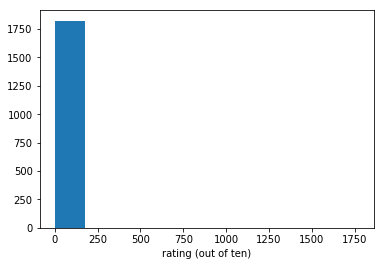

In [191]:
_=plt.hist(tweet_data['rating_numerator'], bins = 10)
_ = plt.xlabel('rating (out of ten)')
plt.show()

In [192]:
rating_IQR = 12-10
low = 10 -1.5*rating_IQR
high = 12+1.5*rating_IQR
print(low, high)

7.0 15.0


In [193]:
tweet_data.loc[tweet_data['rating_numerator']==1776]

,Unnamed: 0,tweet_id,source,text,rating_numerator,rating_denominator,name,stage,expanded_url,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
703,703,749981277374128128,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776.0,10,Atticus,NaN,https://twitter.com/dog_rates/status/749981277...,5550,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


The rating of 1776 is really messing up the data.  It definately qualifies as an outlier and upon inspection of the tweet(pic is below), the rating was done in theme, so we can remove it from our analysis.
<img src="files/patpuppy.jpg">


In [194]:
no_outliers_ratings = tweet_data.loc[tweet_data['rating_numerator']!=1776]
no_outliers_ratings['rating_numerator'].describe()

count    1823.000000
mean       10.881668
std         1.738247
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

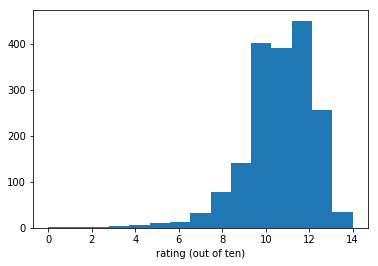

In [195]:
_=plt.hist(no_outliers_ratings['rating_numerator'], bins = 15)
_ = plt.xlabel('rating (out of ten)')
plt.show()

skewed, so median is best average.  the average rating is 11/10

In [196]:
tweet_data['favorite_count'].describe()

count      1824.000000
mean       9231.356908
std       12902.735913
min          80.000000
25%        2108.250000
50%        4370.500000
75%       11524.500000
max      144159.000000
Name: favorite_count, dtype: float64

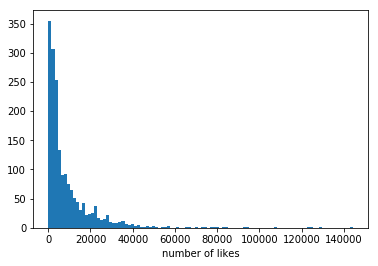

In [197]:
_=plt.hist(tweet_data['favorite_count'], bins = 100)
_ = plt.xlabel('number of likes')
plt.show()

Favorites are heavily skewed to the right so the median value of 4370 likes is the best average number of likes

In [198]:
tweet_data['retweet_count'].describe()

count     1824.000000
mean      2816.747259
std       4856.407509
min         13.000000
25%        627.000000
50%       1399.000000
75%       3236.000000
max      78209.000000
Name: retweet_count, dtype: float64

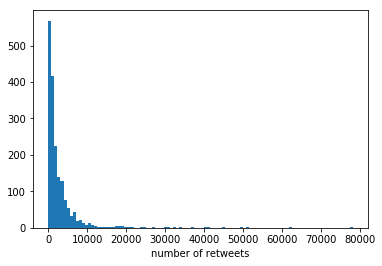

In [199]:
_=plt.hist(tweet_data['retweet_count'], bins = 100)
_ = plt.xlabel('number of retweets')
plt.show()

Number of retweets is heavily skewed to the left, so the median value of 1399 is the best average.

In [200]:
tweet_data['followers_count'].describe()

count    1.824000e+03
mean     5.699188e+06
std      2.165469e+02
min      5.698640e+06
25%      5.698944e+06
50%      5.699224e+06
75%      5.699258e+06
max      5.699508e+06
Name: followers_count, dtype: float64

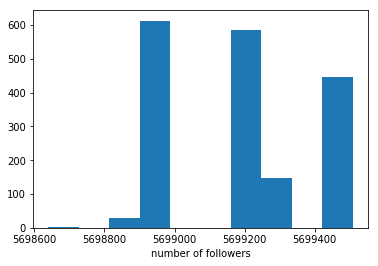

In [201]:
_=plt.hist(tweet_data['followers_count'], bins = 10)
_ = plt.xlabel('number of followers')
plt.show()

In [202]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 26 columns):
Unnamed: 0               1824 non-null int64
tweet_id                 1824 non-null int64
source                   1824 non-null object
text                     1824 non-null object
rating_numerator         1824 non-null float64
rating_denominator       1824 non-null int64
name                     1326 non-null object
stage                    282 non-null object
expanded_url             1824 non-null object
favorite_count           1824 non-null int64
followers_count          1824 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
retweet_count            1824 non-null int64
timestamp                1824 non-null datetime64[ns]
jpg_url                  1824 non-null object
img_num                  1824 non-null int64
p1                       1824 non-null object
p1_conf                  1824 non-null float64
p1_dog             

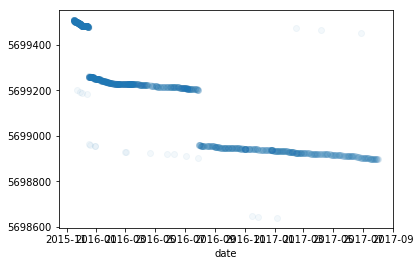

In [203]:
plt.plot_date(tweet_data['timestamp'],tweet_data['followers_count'], alpha = 0.05)
plt.xlabel('date')
plt.show()

In [204]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [205]:
years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

Text(0,0.5,'number of followers')

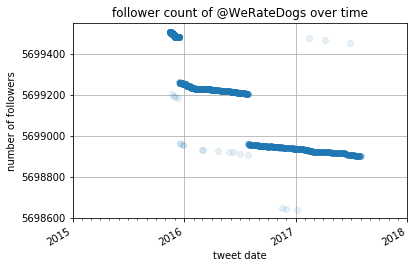

In [206]:
date = tweet_data['timestamp']
fig, ax = plt.subplots()
ax.plot_date(date,tweet_data['followers_count'], linestyle ='None', alpha = 0.1, marker = 'o')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(date.min().year, 1, 1)
datemax = datetime.date(date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)


# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.title ('follower count of @WeRateDogs over time')
plt.xlabel('tweet date')
plt.ylabel('number of followers')


In [207]:
#save plot to computer
fig.savefig('we_rate_dogs_followers_over_time.png', bbox_inches='tight')
plt.close(fig)

it appears that the we rate dogs twitter account steadily lost followers over time.

Text(0,0.5,'number of likes')

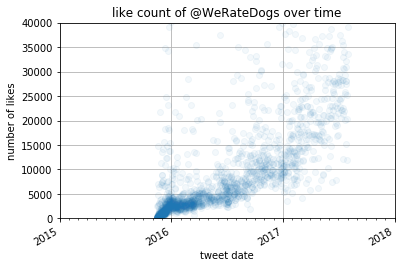

In [208]:
date = tweet_data['timestamp']
fig, ax = plt.subplots()
ax.plot(date,tweet_data['favorite_count'], linestyle ='None', alpha = 0.05, marker = 'o')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(date.min().year, 1, 1)
datemax = datetime.date(date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)
ax.set_ylim(0,40000)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.title ('like count of @WeRateDogs over time')
plt.xlabel('tweet date')
plt.ylabel('number of likes')


In [209]:
fig.savefig('num_likes_over_time.png', bbox_inches = 'tight')
plt.close(fig)

Text(0,0.5,'number of retweets')

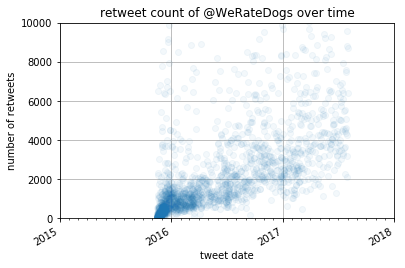

In [210]:
date = tweet_data['timestamp']
fig, ax = plt.subplots()
ax.plot(date,tweet_data['retweet_count'], linestyle ='None', alpha = 0.05, marker = 'o')

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

datemin = datetime.date(date.min().year, 1, 1)
datemax = datetime.date(date.max().year + 1, 1, 1)
ax.set_xlim(datemin, datemax)
ax.set_ylim(0, 10000)

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.title ('retweet count of @WeRateDogs over time')
plt.xlabel('tweet date')
plt.ylabel('number of retweets')


In [211]:
fig.savefig('num_retweets_over_time.png', bbox_inches = 'tight')
plt.close(fig)

likes and retweets seem to increase over time even though the number of followers to the account decreased over time.

In [213]:
from scipy.stats.stats import pearsonr

r = pearsonr(tweet_data['favorite_count'], tweet_data['retweet_count'])
r

(0.91582719592045891, 0.0)

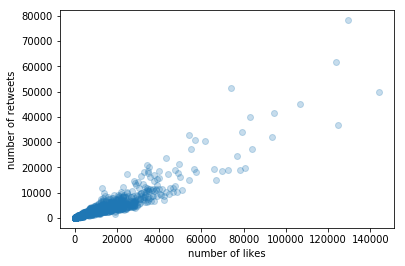

In [214]:
fig= plt.figure()
plt.scatter(tweet_data['favorite_count'], tweet_data['retweet_count'], alpha = 0.25)


plt.xlabel('number of likes')
plt.ylabel('number of retweets')
plt.show()

In [215]:
fig.savefig('likes_v_retweets.png')
plt.close(fig)

the number of likes and the number of retweets is highly correlated (duh).  the more a tweet is liked, the more likely it will be retweeted.

In [216]:
tweet_data['ratio_of_likes_to_retweets'] = tweet_data['retweet_count']/tweet_data['favorite_count']

In [217]:
tweet_data['ratio_of_likes_to_retweets'].describe()

count    1824.000000
mean        0.318874
std         0.098062
min         0.086438
25%         0.249057
50%         0.304818
75%         0.379562
max         0.910813
Name: ratio_of_likes_to_retweets, dtype: float64

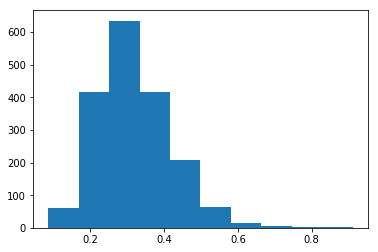

In [218]:
_=plt.hist(tweet_data['ratio_of_likes_to_retweets'])

slightly skewed so use median (0.305) as average.  On average 30% of favorites turn into retweets.

In [219]:
tweet_data['foll_to_fav'] = tweet_data['favorite_count']/tweet_data['followers_count']

In [220]:
tweet_data['foll_to_fav'].describe()

count    1824.000000
mean        0.001620
std         0.002264
min         0.000014
25%         0.000370
50%         0.000767
75%         0.002022
max         0.025296
Name: foll_to_fav, dtype: float64

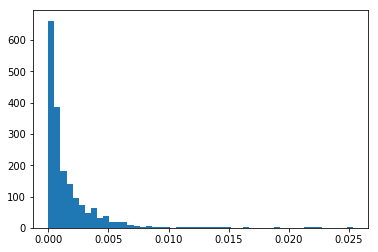

In [221]:
_= plt.hist(tweet_data['foll_to_fav'], bins = 50)

Very skewed.  Median it is.  On average only 0.08% of followers like a tweet

In [222]:
# investigate dog stages
tweet_data['stage'].value_counts()

pupper          186
doggo            60
puppo            23
floofer           7
doggo,pupper      6
Name: stage, dtype: int64

In [223]:
groups = tweet_data.groupby(tweet_data.stage)
groups.groups

{'doggo': Int64Index([  9,  37,  79,  87,  96, 133, 150, 178, 183, 218, 229, 238, 243,
             244, 245, 250, 259, 260, 267, 277, 278, 280, 282, 305, 307, 309,
             320, 321, 347, 351, 356, 358, 415, 427, 433, 488, 506, 509, 546,
             547, 591, 622, 637, 649, 654, 659, 674, 675, 677, 701, 711, 740,
             748, 781, 803, 816, 836, 849, 869, 894],
            dtype='int64'),
 'doggo,pupper': Int64Index([382, 403, 409, 630, 766, 812], dtype='int64'),
 'floofer': Int64Index([40, 413, 541, 708, 792, 809, 1225], dtype='int64'),
 'pupper': Int64Index([  28,   43,   49,   67,   74,   78,   86,  106,  149,  165,
             ...
             1517, 1520, 1521, 1525, 1530, 1533, 1540, 1545, 1550, 1552],
            dtype='int64', length=186),
 'puppo': Int64Index([ 12,  14,  60,  76, 103, 131, 144, 286, 288, 298, 315, 396, 404,
             449, 463, 481, 515, 657, 676, 687, 744, 754, 784],
            dtype='int64')}

In [224]:
pupper = pd.concat([groups.get_group('pupper'), groups.get_group('doggo,pupper')])
doggo = pd.concat([groups.get_group('doggo'), groups.get_group('doggo,pupper')])
floofer = pd.concat([groups.get_group('floofer')])
puppo = pd.concat([groups.get_group('puppo')])

In [225]:
print( len(pupper), len(doggo), len(floofer), len(puppo))

192 66 7 23


In [226]:
pupper[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,192.000000,192.000000
mean,7549.546875,2411.630208
std,11897.289625,3790.071261
min,677.000000,100.000000
25%,2422.250000,683.750000
50%,3283.000000,1218.500000
75%,8025.250000,2496.500000
max,124739.000000,36866.000000


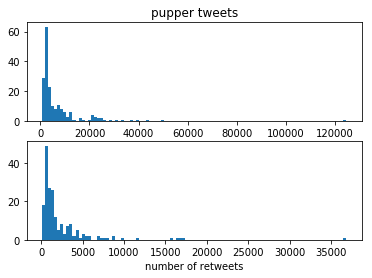

In [227]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
_=plt.hist(pupper['favorite_count'], bins = 100)
plt.title('pupper tweets')
plt.xlabel('number of likes')

plt.subplot(2, 1, 2)
_ = plt.hist(pupper['retweet_count'], bins = 100)
plt.xlabel('number of retweets')

plt.show()

In [228]:
doggo[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,66.000000,66.000000
mean,18946.030303,6785.454545
std,21666.914868,12427.404985
min,2554.000000,710.000000
25%,8149.500000,2016.250000
50%,11784.500000,2943.000000
75%,19854.250000,5098.750000
max,129297.000000,78209.000000


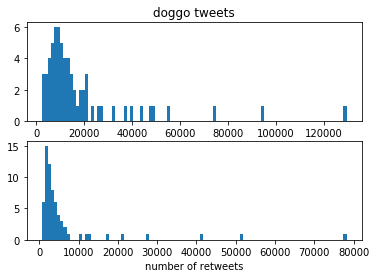

In [229]:
plt.subplot(2, 1, 1)
plt.hist(doggo['favorite_count'], bins = 100)
plt.title('doggo tweets')
plt.xlabel('number of likes')

plt.subplot(2, 1, 2)
plt.hist(doggo['retweet_count'], bins = 100)
plt.xlabel('number of retweets')

plt.show()

In [230]:
puppo[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,23.000000,23.000000
mean,23480.913043,7083.565217
std,30298.203427,10670.475481
min,3233.000000,701.000000
25%,6974.500000,1694.000000
50%,15219.000000,3157.000000
75%,21686.000000,7388.000000
max,144159.000000,49733.000000


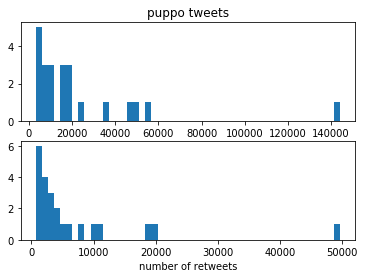

In [231]:
plt.subplot(2, 1, 1)
plt.hist(puppo['favorite_count'], bins = 50)
plt.title('puppo tweets')
plt.xlabel('number of likes')

plt.subplot(2, 1, 2)
plt.hist(puppo['retweet_count'], bins = 50)
plt.xlabel('number of retweets')

plt.show()

In [232]:
floofer['favorite_count'].median()

11138.0

In [233]:
floofer[['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,7.000000,7.000000
mean,13035.857143,4876.000000
std,11126.010148,6042.734177
min,2230.000000,490.000000
25%,4966.500000,1795.500000
50%,11138.000000,3191.000000
75%,17513.500000,4361.000000
max,32923.000000,18138.000000


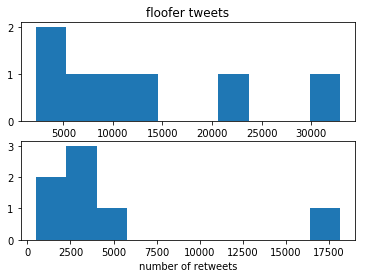

In [235]:
plt.subplot(2, 1, 1)
plt.hist(floofer['favorite_count'])
plt.title('floofer tweets')
plt.xlabel('number of likes')

plt.subplot(2, 1, 2)
plt.hist(floofer['retweet_count'])
plt.xlabel('number of retweets')

plt.show()

all the plots are super skewed so the median is the best average

In [236]:
stage_counts = pd.DataFrame(columns = ['average_likes','average_retweets'], index = ['pupper', 'doggo', 'floofer', 'puppo'])

In [237]:
stage_counts['average_likes']=[pupper['favorite_count'].median(), 
                              doggo['favorite_count'].median(),
                              floofer['favorite_count'].median(),
                              puppo['favorite_count'].median()]
stage_counts['average_retweets'] = [pupper['retweet_count'].median(),
                                   doggo['retweet_count'].median(),
                                   floofer['retweet_count'].median(),
                                   puppo['retweet_count'].median()]

In [238]:
stage_counts['num_tweets']=[len(pupper), len(doggo), len(floofer), len(puppo)]

In [239]:
stage_counts

,average_likes,average_retweets,num_tweets
pupper,3283.0,1218.5,192
doggo,11784.5,2943.0,66
floofer,11138.0,3191.0,7
puppo,15219.0,3157.0,23


- puppers have the most tweets
- puppos have the most likes
- floofers get the most retweets

In [240]:
name_rate = tweet_data.groupby(tweet_data.name, axis=0).mean()
len(name_rate)

909

In [241]:
names = tweet_data['name']

name_count = {}

for i in range(len(names)):
    if names[i] not in name_count:
        name_count[names[i]]= 1
    else:
        name_count[names[i]] += 1

In [242]:
name_counts = pd.DataFrame(list(name_count.items()),columns = ['name', 'count'])
name_counts.head()

,name,count
0,Phineas,2
1,Tilly,1
2,Archie,4
3,Darla,1
4,Franklin,2


In [243]:
popular_names = name_counts.loc[name_counts['count']>=10]
popular_names

,name,count
5,NaN,498
78,Cooper,10
109,Charlie,12
158,Lucy,10


In [244]:
popular_names = ['Cooper', 'Charlie','Lucy']

In [245]:
groups = tweet_data.groupby(tweet_data.name)

pop_name_data = pd.concat([groups.get_group('Cooper'), groups.get_group('Charlie'), groups.get_group('Lucy')])
pop_name_data.sample()

,Unnamed: 0,tweet_id,source,text,rating_numerator,rating_denominator,name,stage,expanded_url,favorite_count,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,ratio_of_likes_to_retweets,foll_to_fav
687,687,751132876104687617,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. He's just so damn happy. 10/10...,10.0,10,Cooper,puppo,https://twitter.com/dog_rates/status/751132876...,5545,...,0.92939,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.00761,True,0.262759,0.000973


In [246]:
pop_name_max = pop_name_data.groupby(pop_name_data.name).max()
pop_name_max.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Charlie to Lucy
Data columns (total 26 columns):
Unnamed: 0                    3 non-null int64
tweet_id                      3 non-null int64
source                        3 non-null object
text                          3 non-null object
rating_numerator              3 non-null float64
rating_denominator            3 non-null int64
expanded_url                  3 non-null object
favorite_count                3 non-null int64
followers_count               3 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
retweet_count                 3 non-null int64
timestamp                     3 non-null datetime64[ns]
jpg_url                       3 non-null object
img_num                       3 non-null int64
p1                            3 non-null object
p1_conf                       3 non-null float64
p1_dog                        3 non-null bool
p2                          

In [247]:
import numpy as np

top_likes = np.percentile(tweet_data['favorite_count'], 90)
top_likes

22955.000000000004

In [248]:
top_likes = tweet_data.loc[tweet_data['favorite_count']>=np.percentile(tweet_data['favorite_count'],99)]

In [249]:
len(top_likes)

19

In [250]:
top_likes['name'].value_counts()

Bo         1
Canela     1
Lilly      1
Walter     1
Stephan    1
Kenneth    1
Earl       1
Zoey       1
Duddles    1
Jamesy     1
Aja        1
Name: name, dtype: int64

In [251]:
top_likes['stage'].value_counts()

doggo     3
puppo     1
pupper    1
Name: stage, dtype: int64

In [252]:
top_likes['p1'].value_counts()

Labrador_retriever          2
Pomeranian                  1
Chihuahua                   1
laptop                      1
Angora                      1
bubble                      1
French_bulldog              1
Eskimo_dog                  1
Lakeland_terrier            1
English_springer            1
chow                        1
Arabian_camel               1
Italian_greyhound           1
swing                       1
golden_retriever            1
Pembroke                    1
standard_poodle             1
Chesapeake_Bay_retriever    1
Name: p1, dtype: int64

In [253]:
low_likes = tweet_data.loc[tweet_data['favorite_count']<=np.percentile(tweet_data['favorite_count'],1)]

In [254]:
len(low_likes)

19

In [255]:
low_likes['name'].value_counts()

Walter    1
Scout     1
Name: name, dtype: int64

In [256]:
low_likes['stage'].value_counts()

Series([], Name: stage, dtype: int64)

In [257]:
low_likes['p1'].value_counts()

Chihuahua                   2
Pembroke                    1
German_shepherd             1
English_setter              1
redbone                     1
Lhasa                       1
Gordon_setter               1
curly-coated_retriever      1
bloodhound                  1
desktop_computer            1
black-and-tan_coonhound     1
miniature_poodle            1
Maltese_dog                 1
pug                         1
miniature_pinscher          1
Bernese_mountain_dog        1
toy_terrier                 1
Chesapeake_Bay_retriever    1
Name: p1, dtype: int64

In [258]:
tweet_data['p1'].value_counts()

golden_retriever               138
Labrador_retriever              95
Pembroke                        88
Chihuahua                       79
pug                             54
chow                            41
Samoyed                         40
Pomeranian                      38
toy_poodle                      38
malamute                        29
cocker_spaniel                  27
French_bulldog                  26
miniature_pinscher              22
Chesapeake_Bay_retriever        22
German_shepherd                 20
Siberian_husky                  20
Staffordshire_bullterrier       19
Eskimo_dog                      18
Maltese_dog                     18
Shetland_sheepdog               18
seat_belt                       18
beagle                          17
Shih-Tzu                        17
teddy                           17
Cardigan                        17
Rottweiler                      17
Lakeland_terrier                16
Italian_greyhound               16
kuvasz              

In [259]:
top_likes.to_csv('top_likes.csv')
low_likes.to_csv('low_likes.csv')

In [260]:
top = tweet_data['favorite_count'].max()

In [261]:
tweet_data['favorite_count'].min()

80

In [262]:
top_retweets = tweet_data.loc[tweet_data['retweet_count']>=np.percentile(tweet_data['retweet_count'],99)]

In [263]:
top_retweets['stage'].value_counts()

doggo     5
puppo     1
pupper    1
Name: stage, dtype: int64

In [264]:
top_retweets['name'].value_counts()

Stephan    1
Sunny      1
Duddles    1
Hurley     1
Bo         1
Zoey       1
Buddy      1
Jamesy     1
Kenneth    1
Name: name, dtype: int64

In [265]:
top_retweets['p1'].value_counts()

Labrador_retriever    2
golden_retriever      2
prison                1
toy_poodle            1
French_bulldog        1
bubble                1
gondola               1
cocker_spaniel        1
Lakeland_terrier      1
Angora                1
English_springer      1
standard_poodle       1
swing                 1
Arabian_camel         1
Eskimo_dog            1
chow                  1
Chihuahua             1
Name: p1, dtype: int64

In [267]:
low_retweets = tweet_data.loc[tweet_data['retweet_count']<=np.percentile(tweet_data['retweet_count'],1)]

In [268]:
len(low_retweets)

19

In [269]:
low_retweets['stage'].value_counts()

Series([], Name: stage, dtype: int64)

In [270]:
low_retweets['name'].value_counts()

Kallie        1
Daryl         1
Christoper    1
Scout         1
Keet          1
Bloo          1
Walter        1
Name: name, dtype: int64

In [271]:
low_retweets['p1'].value_counts()

Chesapeake_Bay_retriever    2
German_shepherd             2
desktop_computer            1
English_setter              1
miniature_pinscher          1
vizsla                      1
curly-coated_retriever      1
Chihuahua                   1
crash_helmet                1
Dandie_Dinmont              1
web_site                    1
redbone                     1
pug                         1
golden_retriever            1
jigsaw_puzzle               1
toy_terrier                 1
black-and-tan_coonhound     1
Name: p1, dtype: int64

In [275]:
from scipy.stats.stats import pearsonr

r = pearsonr(tweet_data['followers_count'], tweet_data['favorite_count'])
r

(-0.53990276818508576, 1.5889639842083755e-138)

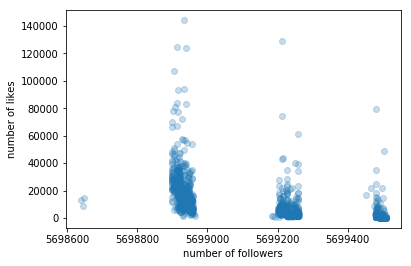

In [273]:
fig= plt.figure()
plt.scatter(tweet_data['followers_count'], tweet_data['favorite_count'], alpha = 0.25)


plt.xlabel('number of followers')
plt.ylabel('number of likes')
plt.show()

In [65]:
fig.savefig('likes_v_followers.png')

There is moderate negative correlation between followers and likes